In [19]:
sys.version

'3.9.7 | packaged by conda-forge | (default, Sep 29 2021, 19:20:46) \n[GCC 9.4.0]'

In [28]:
import sys,os,pickle,copy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Predict

In [30]:
data = pd.DataFrame.from_dict({'Gator': {0: 4.313781936531054},
                                'Longitudinal_wp': {0: 4.992986393969996},
                                'Longitudinal_nwp': {0: 5.29793462202595},
                                'Patch_area': {0: 0.5},
                                'Patch_number': {0: 0.0},
                                'Wp_length': {0: 15.01648977795672},
                                'Transverse_length_gt183': {0: 0.0},
                                'Rutting': {0: 5.859497287122277},
                                'Friction': {0: 33.35714285714279},
                                'Initial_IRI': {0: 0.77},
                                'Bc_asphalt_layer_modulus': {0: 52.34346841470218},
                                'Bc_friction_layer_modulus': {0: 71.51665246581324},
                                'Hydraulic_conductivity': {0: 9945.68555849306},
                                'Mon_precip_avg': {0: 41.802987352812906},
                                'Freeze_index_avg': {0: 17.799766429557273},
                                'Kesal': {0: 547.4040706749079},
                                'Kesal_exp_2': {0: 299651.21659145947},
                                'Age': {0: 4},
                                'Asphalt_specific_gravity': {0: 1.022550151975684},
                                'Aggregate_comp_percent': {0: 100.0},
                                'LATERAL_DEVIATION': {0: 0.83},
                                'SPEED': {0: 50},
                                'SPACING': {0: 60}})

def iri_predict(model, args = {'LATERAL_DEVIATION':0.83, 'SPEED':50, 'SPACING':60, 'Age':4, 'Initial_IRI':.77}, \
                args_data = copy.deepcopy(data)):
    """
    
    Callback
    
        new_iri = IRI_predict.iri_predict(model, args = {'LATERAL_DEVIATION':0.83, 'SPEED':50, 'SPACING':60, 'Age':4, 'Initial_IRI':.77},)
        
    ---------------------------------------------
    
    @input: model
    
        the trained model of lightGBM.
        
        model = pickle.load(open("/home/jovyan/LateralSDE/codes/predict_iri/model.dat", "rb"))
    
    
    """
    
    for arg_key in args.keys():
        args_data.loc[0, arg_key] = args[arg_key]
    
    #
    y_pred = model.predict(args_data)
    
    return y_pred[0]

# Load model

In [22]:
ROOT = "/home/jovyan/MISC/MISC/iri_predict/"

In [23]:
filee = ROOT + 'datas/predict_iri/model.dat'

In [24]:
model = pickle.load(open("/home/jovyan/LateralSDE/codes/predict_iri/model.dat", "rb"))
model

LGBMRegressor(bagging_fraction=0.6, bagging_freq=0, feature_fraction=0.8,
              lambda_l1=0.01, lambda_l2=0.01, learning_rate=0.015, max_bin=265,
              max_depth=9, metrics='l1', min_data_in_leaf=0, min_split_gain=0,
              n_estimators=10000, num_leaves=35, objective='regression')

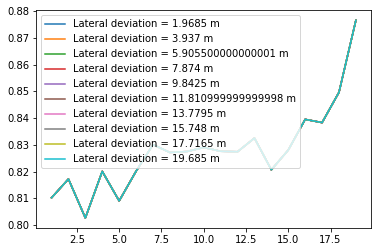

In [32]:
fig,ax = plt.subplots()
#
ages =  range(1, 20)
#
for LATERAL_DEVIATION in np.linspace(.05, .5, 10):
    wandering_unit_m =  LATERAL_DEVIATION*39.37
    ys = [iri_predict(model, {'Age':age, 'LATERAL_DEVIATION':wandering_unit_m}) for age in ages]
    ax.plot(ages, ys, label = 'Lateral deviation = ' + str(wandering_unit_m) + ' m')
ax.legend()